<a href="https://colab.research.google.com/github/jesusandresbaez/Estres_y_estudios_clinicos/blob/master/Estres_y_estudios_clinicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Preparando la base de datos para el análisis
###1.1 Conectamos con la nube de Google 

In [63]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


###1.2 Importamos las librerias que utilizaremos

In [64]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### 1.3 Importamos nuestros DataFrames

In [65]:
df20 = pd.read_csv('/content/drive/MyDrive/DataAcademy Platzi/Bd/df20.csv')
df19 = pd.read_csv('/content/drive/MyDrive/Marca Personal/Data Sicence/Laboratorio 2020/df19.csv')
df21 = pd.read_csv('/content/drive/MyDrive/Marca Personal/Data Sicence/Laboratorio 2020/df21.csv')

### 1.4 Concatenamos los DataFrames
Incluye una variable llamada "Periodo" a cada DataFrame que indiqué si el dataframe pertenece al 2019 o al 2020. Esto ayudará a saber si la fila de registros pertenece al 2019 o 2020 al unir los DataFrames.

In [66]:
df20['Periodo']='2020'
df19['Periodo']='2019'
df21['Periodo']='2021'
df = pd.concat([df19, df20, df21], ignore_index=True)

### 1.5 Analizando las variables del Dataset creado

- Aplicamos el método ".dtypes" a nuestro Dataset
- Tenemos que cambiar las variables "Fecha" porque se muestra como tipo "objeto" y la variable "Cantidad" porque se muestra como "int64" 


In [67]:
df.dtypes

Clave          object
Estudio        object
Costo_dlls    float64
Fecha          object
Genero         object
Cantidad        int64
Periodo        object
dtype: object

### 1.6 Modificamos las variables según sea su tipo

In [68]:
df['Fecha'] = pd.to_datetime(df['Fecha']) #Cambio de variable tipo "object" a "fecha"
df[['Cantidad']] = df[['Cantidad']].astype(int) #Cambio de variable tipo  "float" a "int64"
df[['Genero']] = df[['Genero']].astype('category') #Cambio de variable tipo "object" a "Category"
df['Periodo'] = df[['Periodo']].astype('category') #Cambio de variable tipo "object" a "Category"

### 1.7 Vamos a crear una columna con el número del mes extraido de la variable "Fecha"

In [69]:
#Generamos una columna nueva con el mes correspondiente a cada registro extraido de la variable Fecha
df['Mes'] = df['Fecha'].dt.month 

In [70]:
df

,Clave,Estudio,Costo_dlls,Fecha,Genero,Cantidad,Periodo,Mes
0,MX-0843,PAPANICOLAU,14.5,2019-08-30,Femenino,1,2019,8
1,MX-0843,PAPANICOLAU,14.5,2019-11-21,Femenino,1,2019,11
2,MX-0843,PAPANICOLAU,14.5,2019-12-02,Femenino,1,2019,12
3,MX-0843,PAPANICOLAU,14.5,2019-12-17,Femenino,1,2019,12
4,MX-0843,PAPANICOLAU,14.5,2019-08-14,Femenino,1,2019,8
...,...,...,...,...,...,...,...,...
15469,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021,2
15470,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021,2
15471,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021,2
15472,MX-02010,ANTIDOPING 5 CON CERTIFICAADO MEDICO,30.0,2021-02-16,Masculino,1,2021,2


# 2. Realizando el análisis de nuestra base de datos
## 2.1 Visualizamos el historico de la demanda de estudios clínicos del 2019 al 2021 de forma mensual

### 2.1.1 Creación del dataframe de la cantidad de estudios realizados mensualmente

In [71]:
#Creamos nuestro dataframe para visualizar el historico
df_mensual = df.groupby(['Fecha'])[['Cantidad']].sum().reset_index()

#A nuestro Dataframe le aplicamos el metodo .set_index() que pondra como indice principal a la variable 'Fecha'
df_mensual = df_mensual.set_index('Fecha')

#Con el metodo .resample('m').sum() vamos a sumar la cantidad de estudios por mes 
df_mensual = df_mensual.resample('m').sum().reset_index()

#Obtenemos nuestro dataframe de los 3 años con al suma de lso estudios realizados de forma mensual
df_mensual.index=df_mensual.index+1
df_mensual.head()

,Fecha,Cantidad
1,2019-01-31,125
2,2019-02-28,151
3,2019-03-31,107
4,2019-04-30,140
5,2019-05-31,168


### 2.1.2 Creación de la gráfica líneal del historico mensual del 2019 al 2021

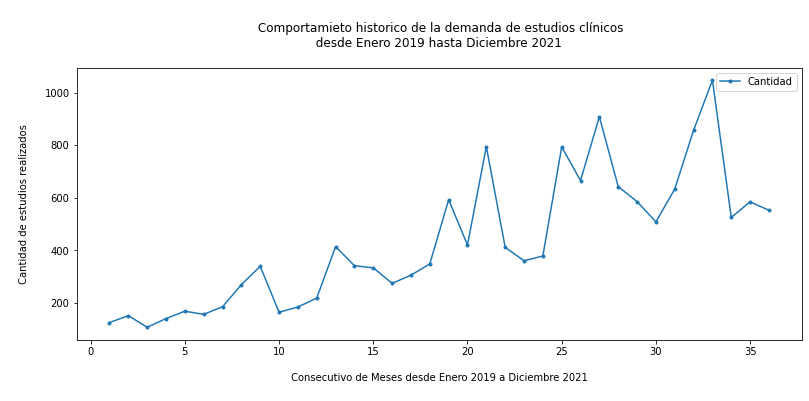

In [72]:
#Parametros de la Gráfica
df_mensual.plot(kind="line",  y='Cantidad', marker = '.',figsize=(13,5))
plt.title('\n Comportamieto historico de la demanda de estudios clínicos\n  desde Enero 2019 hasta Diciembre 2021  \n')

plt.xlabel('\n Consecutivo de Meses desde Enero 2019 a Diciembre 2021 \n')
plt.ylabel('\n Cantidad de estudios realizados \n')
plt.savefig("Historico_mensual_3_años.jpg", dpi=300, bbox_inches='tight')
plt.xticks(rotation = 0);
plt.show()

# 3. Visualización del comportamiento de la demanda de estudios clínicos por mes durante los 3 años 

### 3.1 Creamos nuestra tabla para visualizar los datos de cada año por mes

In [73]:
#Creamos nuestro groupby con "Periodo", "Mes" y .sum para sumar la cantidad
df_years = df.groupby(['Periodo','Mes'])[['Cantidad']].sum().reset_index()

In [74]:
df_years.head()

,Periodo,Mes,Cantidad
0,2019,1,125
1,2019,2,151
2,2019,3,107
3,2019,4,140
4,2019,5,168


###3.2 Creamos el dataframe con los valores por mes y año para graficarlo

---



In [75]:
#Creamos el dataframe con los valores por mes y año para graficarlo, los datos fueron extraidos
#del groupby anterior
datos = [[125, 151, 107, 140, 168, 156, 185, 269, 339, 164, 184, 218,],
        [415, 344, 335, 275, 305, 349, 592, 421, 833, 416, 363, 384,],
        [826, 702, 964, 684, 600, 520, 654, 890, 1101, 557, 603, 568]]
columnas = [['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']] # definimos los nombres de las columnas
filas = ['2019', '2020', '2021'] # definimos los nombres de las filas

#Creamos nuestro dataframe
df_years_month = pd.DataFrame(datos, columns=columnas, index=filas).transpose()
df_years_month.head()

,2019,2020,2021
Ene,125,415,826
Feb,151,344,702
Mar,107,335,964
Abr,140,275,684
May,168,305,600


### 3.3 Creación de una gráfica lineal para visualizar el comportamiento de la demanda mensual de estudios clínicos en cada año

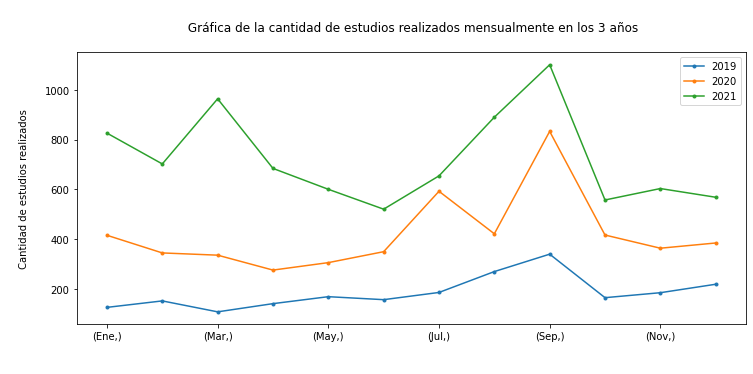

In [76]:
#Parámetros de la gráfica
df_years_month[['2019','2020','2021']].plot(kind ='line',  marker = '.',figsize=(12,5))
plt.title('\n Gráfica de la cantidad de estudios realizados mensualmente en los 3 años\n')
plt.xlabel('\n ')
plt.ylabel('\n Cantidad de estudios realizados \n')
plt.savefig("Comparativo_mensual_3_años.jpg", dpi=300, bbox_inches='tight')
plt.xticks(rotation = 0);

### 3.4 Generamos la tabla de datos estadísticos de los 3 años

In [77]:
df_years_month.describe()

,2019,2020,2021
count,12.000000,12.000000,12.000000
mean,183.833333,419.333333,722.416667
std,64.864661,152.859611,183.030280
min,107.000000,275.000000,520.000000
25%,148.250000,341.750000,592.000000
50%,166.000000,373.500000,669.000000
75%,193.250000,417.250000,842.000000
max,339.000000,833.000000,1101.000000


### 3.5 Creamos una gráfica de "área" para visualizar el comportamiento de cada mes para los 3 años

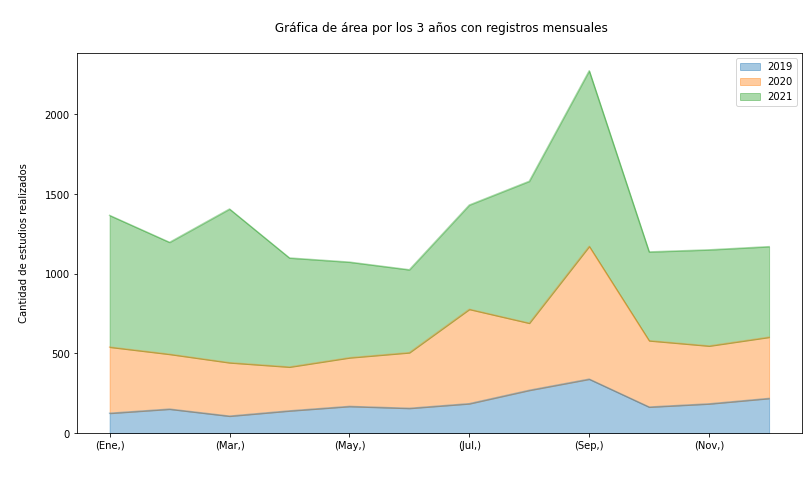

In [78]:
#Gráfica de área de los 3 años
df_years_month.plot.area(alpha=0.4, figsize=(13,7))
plt.title('\n Gráfica de área por los 3 años con registros mensuales\n')
plt.xlabel('\n ')
plt.ylabel('\n Cantidad de estudios realizados \n')
plt.savefig("Comparativo_mensual_3_densidad.jpg", dpi=300, bbox_inches='tight')
plt.xticks(rotation = 0);

## 4. Visualizamos el comportamiento de la demanda de estudios clínicos por día en Septiembre 

### 4.1 Al dataset principal le agregamos la columna día según la variable "Fecha"

In [79]:
#Agregamos a nuestro dataframe principal la columna de día 
df['Dia'] = df['Fecha'].dt.day

In [80]:
df.head()

,Clave,Estudio,Costo_dlls,Fecha,Genero,Cantidad,Periodo,Mes,Dia
0,MX-0843,PAPANICOLAU,14.5,2019-08-30,Femenino,1,2019,8,30
1,MX-0843,PAPANICOLAU,14.5,2019-11-21,Femenino,1,2019,11,21
2,MX-0843,PAPANICOLAU,14.5,2019-12-02,Femenino,1,2019,12,2
3,MX-0843,PAPANICOLAU,14.5,2019-12-17,Femenino,1,2019,12,17
4,MX-0843,PAPANICOLAU,14.5,2019-08-14,Femenino,1,2019,8,14


### 4.2 Extraemos la información de septiembre de cada año y la guardamos en 3 variables por año

In [81]:
#Extraemos los datos de septiembre 2019 y creamos nuestro dataframe 
sept_19 = df.set_index('Fecha')
sept_19 = sept_19.loc['2019-09-01' : '2019-09-30']
sept_19 = sept_19.groupby(['Dia'])[['Cantidad']].sum()#.reset_index()

#Extraemos los datos de septiembre 2020 y creamos nuestro dataframe 
sept_20 = df.set_index('Fecha')
sept_20 = sept_20.loc['2020-09-01' : '2020-09-30']
sept_20 = sept_20.groupby(['Dia'])[['Cantidad']].sum()#.reset_index()

#Extraemos los datos de septiembre 2021 y creamos nuestro dataframe 
sept_21 = df.set_index('Fecha')
sept_21 = sept_21.loc['2021-09-01' : '2021-09-30']
sept_21 = sept_21.groupby(['Dia'])[['Cantidad']].sum()#.reset_index()

### 4.3 Creamos una tabla con la suma de estudios clínicos realizados diariamente en el mes de septiembre de los 3 años

In [82]:
#Extraemos los datos de cada dataframe creado 
septiembre = pd.DataFrame()

#Indexamos la columa 'Día'
x = range(0,30)
septiembre ['Dia'] = list(x)
septiembre= septiembre.set_index('Dia')
septiembre.index=septiembre.index+1 #Con este metodo iniciamos el index en 1
septiembre

septiembre['sept_19'] = sept_19['Cantidad']
septiembre['sept_20'] = sept_20['Cantidad']
septiembre['sept_21'] = sept_21['Cantidad']

septiembre.fillna(0, inplace=True)
septiembre

,sept_19,sept_20,sept_21
Dia,,,
1,10.0,16,55
2,21.0,27,132
3,35.0,58,73
4,16.0,37,53
5,25.0,12,24
6,13.0,49,49
7,17.0,44,40
8,7.0,28,91
9,11.0,32,50


### 4.4 Creamos una gráfica líneal para observar el comportamiento de la demanda en los 3 años

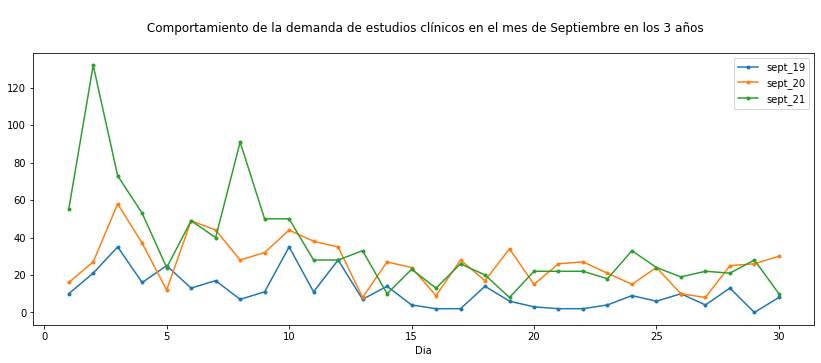

In [83]:
#Parámetros de la gráfica
septiembre.plot(kind ='line', marker = '.',figsize=(14,5))
plt.title('\n Comportamiento de la demanda de estudios clínicos en el mes de Septiembre en los 3 años\n')
plt.savefig("Comportamiento_diario_septiembre_lineal.jpg", dpi=300, bbox_inches='tight');

### 4.5 Creamos una gráfica de "área" para visualizar el comportamiento del mes de septiembre en cada año

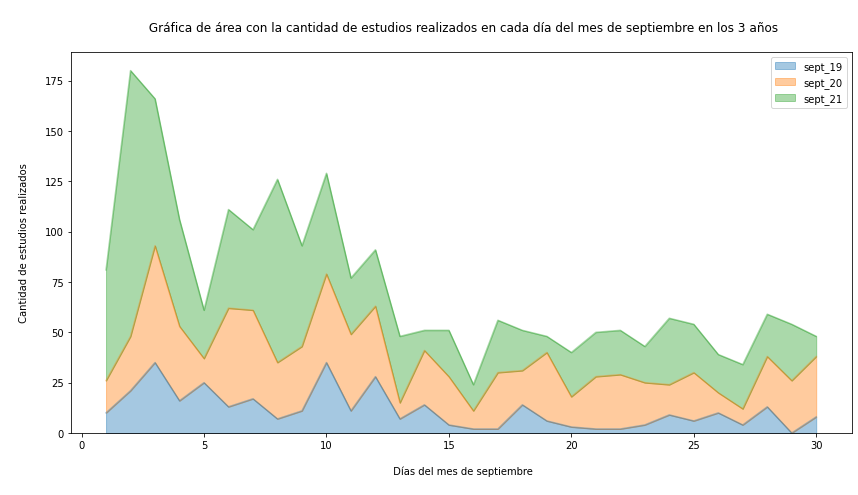

In [84]:
#Creamos una gráfica de densidad 
septiembre.plot.area(alpha=0.4, figsize=(14,7));
plt.title('\n Gráfica de área con la cantidad de estudios realizados en cada día del mes de septiembre en los 3 años\n')
plt.xlabel('\n Días del mes de septiembre\n ')
plt.ylabel('\n Cantidad de estudios realizados \n')
plt.savefig("Comportamiento_diario_septiembre_area.jpg", dpi=300, bbox_inches='tight');

### 4.6 Creamos una gráfica de barras para comparar la cantidad de estudios realizados en cada día del mes de septiembre para los 3 años

In [85]:
sept_dia = pd.DataFrame()
sept_dia['sept_19'] = sept_19['Cantidad']
sept_dia['sept_20'] = sept_20['Cantidad']
sept_dia['sept_21'] = sept_21['Cantidad']
sept_dia.head()

,sept_19,sept_20,sept_21
Dia,,,
1,10,16,55
2,21,27,132
3,35,58,73
4,16,37,53
5,25,12,24


### 4.7 Creammos la gráfica para comparar el comportamiento diario en el mes de septiembre en los 3 años

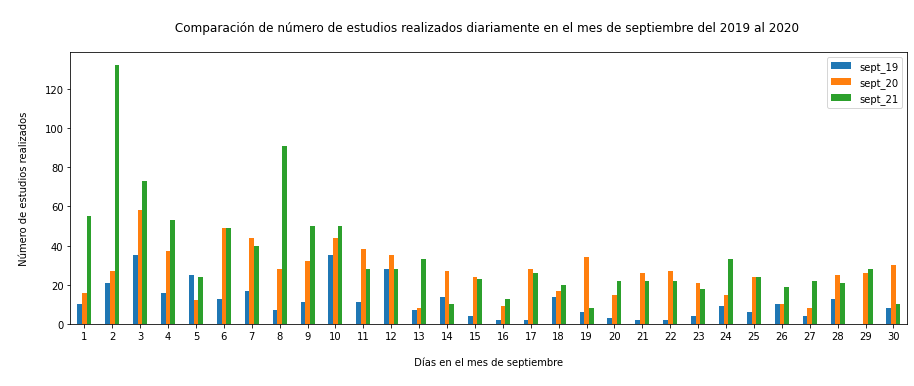

In [86]:
#Parámetros de la grafica
septiembre.plot(kind ='bar', figsize=(15,5))
plt.title('\n Comparación de número de estudios realizados diariamente en el mes de septiembre del 2019 al 2020  \n')
plt.ylabel('\n Número de estudios realizados \n')
plt.xlabel('\n Días en el mes de septiembre \n')
plt.savefig("Comparativo_diario_sept.jpg", dpi=300, bbox_inches='tight')
plt.xticks(rotation = 0);

### 5. Creando la tabla de los 10 estudios clínicos más solicitados en septiembre 

In [87]:
#Generando los 10 estudios más solicitados de septiembre del 2019
sept19 = df.set_index('Fecha')
sept19 = sept19.loc['2019-09-01' : '2019-09-30']
sept19.reset_index()
sept19 = sept19.groupby(['Estudio'])[['Cantidad']].sum().sort_values(by='Cantidad', ascending= False).head(10).reset_index()

#Generando los 10 estudios más solicitados de septiembre del 2020
sept20 = df.set_index('Fecha')
sept20 = sept20.loc['2020-09-01' : '2020-09-30']
sept20.reset_index()
sept20 = sept20.groupby(['Estudio'])[['Cantidad']].sum().sort_values(by='Cantidad', ascending= False).head(10).reset_index()

#Generando los 10 estudios más solicitados de septiembre del 2021
sept21 = df.set_index('Fecha')
sept21 = sept21.loc['2021-09-01' : '2021-09-30']
sept21.reset_index()
sept21 = sept21.groupby(['Estudio'])[['Cantidad']].sum().sort_values(by='Cantidad', ascending= False).head(10).reset_index()

#Creando la tabla de los estudios más solicitados en septiembre
top_diez_estudios = pd.DataFrame()
top_diez_estudios['Estudios_2019'] = sept19['Estudio']
top_diez_estudios['Estudios_2020'] = sept20['Estudio']
top_diez_estudios['Estudios_2021'] = sept21['Estudio']
top_diez_estudios

,Estudios_2019,Estudios_2020,Estudios_2021
0,CITOMETRIA HEMATICA COMPLETA,CITOMETRIA HEMATICA COMPLETA,PRUEBA DE CONTAGIO COVID
1,QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),DENGUE NS1 Igg e Igm,CITOMETRIA HEMATICA COMPLETA
2,EXAMEN GENERAL DE ORINA,EXAMEN GENERAL DE ORINA,EXAMEN GENERAL DE ORINA
3,PRUEBA DE EMBARAZO (PIE),QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS)
4,CULTIVO DE ORINA (UROCULTIVO) CON MIC,PRUEBA DE EMBARAZO (PIE),HEMOGLOBINA GLUCOSILADA
5,HEMOGLOBINA GLUCOSILADA,HEMOGLOBINA GLUCOSILADA,"DIMERO ""D"""
6,GRUPO SANGUINEO Y RH,QUIMICA SANGUINEA PARCIAL,PRUEBA DE EMBARAZO (PIE)
7,PERFIL HEPATICO COMPLETO,PRUEBA DE CONTAGIO COVID,PRUEBA COVID ANTICUERPOS
8,REACCIONES FEBRILES,GLUCOSA SERICA,GRUPO SANGUINEO Y RH
9,PERFIL TIROIDEO 1,PERFIL HEPATICO COMPLETO,QUIMICA SANGUINEA DE 10 ELEMENTOS


### 5.1 Generando la tabla con la cantidad de estudios realizados en el mes de septiembre en los 3 años

In [88]:
#Generando la tabla con la cantidad de estudios realizados en el mes de septiembre en el año pre pandemia y años pandemias
top_diez_cantidad = pd.DataFrame()
top_diez_cantidad['Estudios_2019'] = sept19['Cantidad']
top_diez_cantidad['Estudios_2020'] = sept20['Cantidad']
top_diez_cantidad['Estudios_2021'] = sept21['Cantidad']
top_diez_cantidad

,Estudios_2019,Estudios_2020,Estudios_2021
0,89,227,194
1,41,96,125
2,38,74,113
3,23,63,91
4,9,36,69
5,8,22,46
6,8,16,46
7,7,15,41
8,7,15,39
9,7,14,37


### 6. Creando la tabla de estadística descriptiva de todo el mes de septiembre en los 3 años

In [89]:
#tabla_estadistica 
tabla_estadistica = septiembre.describe()
tabla_estadistica

,sept_19,sept_20,sept_21
count,30.000000,30.000000,30.000000
mean,11.300000,26.466667,34.900000
std,9.421728,12.475447,26.333864
min,0.000000,8.000000,8.000000
25%,4.000000,16.250000,21.250000
50%,9.500000,26.500000,25.000000
75%,14.000000,33.500000,46.750000
max,35.000000,58.000000,132.000000


### 6.1 Generando la tabla de valores estadísticos para los primeros 15 días del mes de Septiembre

In [90]:
#Aplicamos el describe  para los primeros 15 días del mes de septiembre
septiembre.head(15).describe()

,sept_19,sept_20,sept_21
count,15.000000,15.000000,15.000000
mean,16.933333,31.933333,49.266667
std,9.873968,13.848500,30.848632
min,4.000000,8.000000,10.000000
25%,10.500000,25.500000,28.000000
50%,14.000000,32.000000,49.000000
75%,23.000000,41.000000,54.000000
max,35.000000,58.000000,132.000000


### 6.2 Generando la tabla de valores estadísticos para los últimos 15 días del mes de Septiembre

In [91]:
#Aplicamos el describe  para los últimos 15 días del mes de septiembre
septiembre.tail(15).describe()

,sept_19,sept_20,sept_21
count,15.000000,15.000000,15.000000
mean,5.666667,21.000000,20.533333
std,4.287301,8.159132,6.523219
min,0.000000,8.000000,8.000000
25%,2.000000,15.000000,18.500000
50%,4.000000,24.000000,22.000000
75%,8.500000,26.500000,23.000000
max,14.000000,34.000000,33.000000


In [92]:
septiembre

,sept_19,sept_20,sept_21
Dia,,,
1,10.0,16,55
2,21.0,27,132
3,35.0,58,73
4,16.0,37,53
5,25.0,12,24
6,13.0,49,49
7,17.0,44,40
8,7.0,28,91
9,11.0,32,50




---

